# Inversion cheat sheet

This is a summary cheet sheet which combines the key principles into one easily accessible format for the purpose of revision and access during the class test.

# Table of contents
#### [Lecture 1: Forward vs Inverse Problems, Linear Algebra](#lecture1)
#### [Lecture 2: Optimisation, Rank, Range, Null Space](#lecture2)
#### [Lecture 3: Full Waveform Inversion (FWI)](#lecture3)
#### [Lecture 4: ](#lecture4)
<hr/>

## Lecture 1: forward vs inverse problems, linear algebra <a name="lecture1"></a>

In STEM, we must pose many problems as inversion or optimsations problems. In the most general sense, inversion asks for some function 

$$y=f(x),$$

given $y$, what is $x$? This is contrary to the forward problem, which asks: given $x$, what is $y$? Thus, inversion problems can be formulated as 

$$f(x) = y,$$ 

or more commonly as 

$$A\mathbf{x}=\mathbf{b},$$ 

for a system of equations. Often, we choose to simplify our problem by approximating non-linear terms with linear functions. Then, it is important to remember that a linear function commutes with addition, i.e., 

$$f(\mathbf{x+y}) = f(\mathbf{x})+f(\mathbf{y}),$$
$$f(\alpha \mathbf{x})=\alpha f(\mathbf{x}), \ \alpha \in \mathbb{R}.$$

### Matrix properties

For some matrix $A$

$$\text{e.g.,} \ A = \begin{pmatrix} a & b \\ c&d \end{pmatrix}$$

the four basic matrix properties read that

$$(A+B)^T=A^T+B^T,$$ 

i.e., addition and transpose operations commute,

$$(\alpha A^T)=\alpha(A^T), \ \alpha \in \mathbb{R}$$

i.e., scalar multiplication and transpose operations commute,

$$(AB)^T = B^T A^T,$$

i.e., matrix multiplication and transpose operations commute, and finally

$$(A^T)^T = A.$$ 

Furthermore, we may say that 

$$A=A^T \Leftrightarrow \ A \ \text{is symmetric},$$
$$A=-A^T \Leftrightarrow \ A \ \text{is skew symmetric},$$

in which case 

$$A = \begin{pmatrix} 0 & b \\ -b&0 \end{pmatrix}.$$

This classification may be important later since the eigenvalues of a symmetric matrix are always real, and those of a skew symmetric matrix are always imaginary or zero. 

**We can implement checks of these properties as below**



In [40]:
import numpy as np

In [41]:
"Checking transpose properties"

# Define arbitrary dimensions
m = 3
n = 3

# Generate our random matrix
A = np.random.random((m, n))
B = np.random.random((m, n))

# Addition commutation (ABt = AtBt)
ABt = (A+B).T
AtBt = A.T + B.T
print(f'Addition commutes: {np.allclose(ABt, AtBt)}')

# Scalar multiplication ((aA)t = a(At))
alpha = 5

aAt = (alpha * A).T
a_At = alpha * (A.T)
print(f'Scalar multiplication commutes: {np.allclose(aAt, a_At)}')

# Matrix multiplication ((AB)t = AtBt)
ABt = (A@B).T
AtBt = B.T @ A.T
print(f'Matrix multiplication commutes: {np.allclose(ABt, AtBt)}')

# Double transpose
Att = (A.T).T
print(f'Double transpose: {np.allclose(Att, A)}')

Addition commutes: True
Scalar multiplication commutes: True
Matrix multiplication commutes: True
Double transpose: True


### Matirx-vector multiplication

It can be useful to think of vector-matrix multiplication as the weighted sum of the columns of the matrix. For the matrix $A, \ A \in \mathbb{R}^{m\times n}$ and vector $\mathbf{x}, \ \mathbf{x} \in \mathbb{R}^{n}$ in the system $A\mathbf{x}=\mathbf{b}, \ \mathbf{b} \in \mathbb{R}^m $ we can write 

$$\mathbf{b_i} = \sum^{n}_{j=1} a_{ij}x_j, \ i=1,\ 2, \dots,\ m,$$ 

which is equivalent to saying

$$A\mathbf{x} = [x_0 a_{:1}, \ x_1 a_{:2}, \dots,\ x_n a_{:m}],$$

which we can compute in the following manner.

In [42]:
# Our function to execute matrix-vector mutliplication, as defined in the lecture

def mat_vec_product(A, x):
    m, n = np.shape(A)
    assert x.ndim == 1 # restrict to the case where x is 1D
    assert n == len(x) # as 1D we can check the length of x is consistent with A
    b = np.zeros(m) # and then initialise to zero the appropriate length array for b
    for i in range(m):
        for j in range(n):
            b[i] += A[i, j] * x[j]
    return b

In [43]:
# Defining our dimensions
m = 4
n = 4

# Let's define A and x
A = np.random.random((m, n))
x = np.random.random((n,))

# Executing the product using the function defined in the lecture
b = mat_vec_product(A, x)

# Computing the product directly 
Ax = A@x

# Checking similarity between two methods
np.allclose(b, Ax)

True

### Newton's method

We can often pose an inversion problem as a root finding problem by solving iteratively for $x_{i+1}$. If we have some function $f$, then we can find a root by setting $f(x)=0$ and solving for $x$. Newton's iterative solution method reads  

$$x_{i+1}=x_i - \frac{f(x_i)}{f'(x_i)}.$$

### Curve fitting

With a system of equations, often it is the case that there is no absolute solution vector which satisfies all constraints posed by the equations in the model. In this case, our inversion problem becomes an optimisation problem. The least squares solution minimises the square difference between a function evaluated at a guess location $x_i$ and the given data points. The error $E$ can be defined as

$$||A\mathbf{x}-\mathbf{y}||^2_2.$$ 

It will be shown later that the least squares solution to the system $A\mathbf{x}=\mathbf{b}$ is found by solving

$$A^TA\mathbf{x}=V^T\mathbf{y},$$

which holds for under determined problems. We can approximate a polynomial for a given set of data in the following manner.

In [44]:
import matplotlib.pyplot as plt


poly_coeffs = 
 [-0.00552147  0.09889271 -0.43193108  0.75909819]


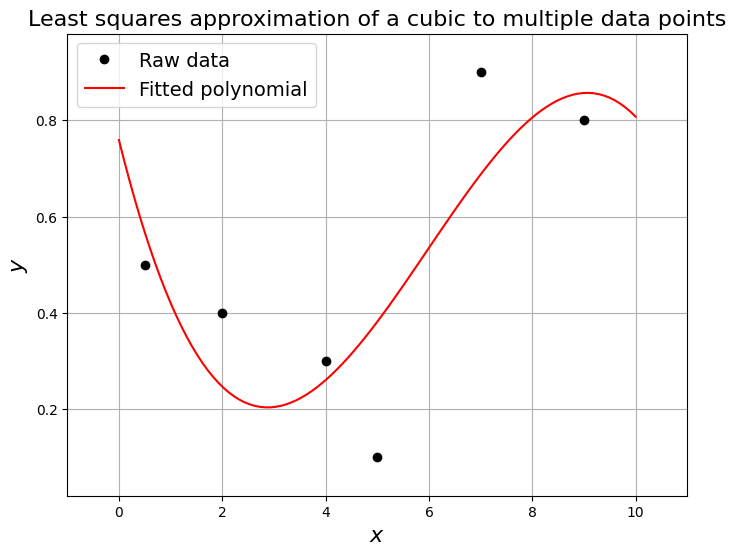

In [45]:
# Our data from Lecture 1:
x = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
y = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Consider a polynomial of degree 3 - so not high enough to go through all the data
N = 3

# Compare against the coefficient that numpy's polyfit gives us
poly_coeffs = np.polyfit(x, y, N)
print('\npoly_coeffs = \n', poly_coeffs)

xx = np.linspace(0, 10, 100) # To generate smooth curve

# Evaluate the polynomial at the given x values
y_poly = np.polyval(poly_coeffs, xx)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Overlay raw data
ax1.plot(x, y, 'ko', label='Raw data')
ax1.plot(xx, y_poly, 'r-', label='Fitted polynomial')
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Least squares approximation of a cubic to multiple data points', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14);

## Lecture 2: Optimisation, Rank, Range, and Null Space<a name="lecture2"></a>

Optimisation seeks to find a value for $x$ such that

$$f(x),$$

has a minimum value. A simple way to approach this problem is to slve 

$$f(x)=0,$$

for $x$. In this case, we have posed the optimisation problem as an inversion problem by asking "given $f'(\bullet)=0,$ what is $\bullet$?". This will give us the stationary points of the problem.

We can also pose inversion as an optimisation problem by defining a misfit term and perturbing our model such that the misfit is miniised. The least squares solution is an example of this.

#### Geometric thinking: a brief note on solvability

Understanding existence and uniqueness is simple in the case of a system of two linear equations. If a unique solution exists then those two lines intersect at one point. Then, there are two remaining cases:

- They never intersect (non-existence)
- They intersect at every point (non-uniqueness)

### (Reduced) row echelon form

Regardless of the solution approach, there are three important things to clarify when solving an inversion problem:

1. Does a solution exist?
2. Is the solution unique?
3. Is the solution stable?

To understand these queries we can transform our matrix to Row Echelon Form (REF). In this form,

- All pivot rows have a leading 1,
- All rows containing non-zero terms are above a row of all zeros.

Note that sometimes we may want to transform to Reduced Row Echelon Form (RREF), in which case **every column containing a leading 1 has zeros everywhere else in the column.** Putting the matrix in this form leads to an interesting case wheb $A\mathbf{x}=0,$ because the final equation in the system will read $0x_n =0,$ We will see more on this after we transform the matrix.

Let's go through an example of how to form the REF and RREF. Remember that each row of our matrix encodes the algebraic system and thus we can

- Multiply each row by a non-zero scalar
- Add mutliples of one row to another
- Swap rows

Let's begin.

$$ A =
\begin{pmatrix}
-2 & -4 & -20 \\
2 & 6 & 24 \\
2 & 10 & 32
\end{pmatrix},
$$

$(1) \leftarrow -0.5\times(1),$

$$ 
\begin{pmatrix}
1 & 2 & 10 \\
2 & 6 & 24 \\
2 & 10 & 32
\end{pmatrix},
$$

$(3) \leftarrow (3) - 2\times (1),$

$$ 
\begin{pmatrix}
1 & 2 & 10 \\
2 & 6 & 24 \\
0 & 6 & 12
\end{pmatrix},
$$

$(2) \leftarrow (2) - 2\times (1),$

$$ 
\begin{pmatrix}
1 & 2 & 10 \\
0 & 6 & 24 \\
0 & 6 & 12
\end{pmatrix},
$$

$(2) \leftarrow 0.5(2) - (1),$

$$ 
\begin{pmatrix}
1 & 2 & 10 \\
0 & 1 & 2 \\
0 & 6 & 12
\end{pmatrix},
$$

$(3) \leftarrow (3) - 6\times (2),$

$$ 
\begin{pmatrix}
1 & 2 & 10 \\
0 & 1 & 2 \\
0 & 0 & 0
\end{pmatrix},
$$

which now satsifies the conditions of a REF matrix. Let's perform a final operation to achieve RREF.

$(1) \leftarrow (1) - 2\times (2),$

$$ 
\begin{pmatrix}
1 & 0 & 6 \\
0 & 1 & 2 \\
0 & 0 & 0
\end{pmatrix}.
$$

### Rank, range, and null space

With a RREF matrix, we can characterise the solvability of a system $A\mathbf{x}=\mathbf{b}$ by setting $\mathbf{b}=0$ and ignroing the trivial case of $\mathbf{x}=0.$ By doing so, we can parameterise the *null space* of the system, which is the vector space which contains all vectors $\mathbf{x}$ that are solutions to the equation $A\mathbf{x}=0$.

Now, we want to first check the *rank* of the matrix, which is the number of linearly independent columns (i.e., the number of columns which may be combined as scalar multiples to form another). The columns of our matrix are 

$$
\mathbf{c}_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad
\mathbf{c}_2 = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}, \quad
\mathbf{c}_3 = \begin{pmatrix} 6 \\ 2 \\ 0 \end{pmatrix},
$$

and we want to check if there are scalars \( a \) and \( b \) such that:

$$
a \mathbf{c}_1 + b \mathbf{c}_2 = \mathbf{c}_3.
$$

This equation is satisfied by $a = 6, \ c=2.$ Thus we have that the third column can be formed by a linear combination of the scalar multiples of the 1st and 2nd, meaning the rank of the matrix is 2.

Now, let's parameterise the null space. The system 

$$ A\mathbf{x} \equiv
\begin{pmatrix}
1 & 0 & 6 \\
0 & 1 & 2 \\
0 & 0 & 0
\end{pmatrix} = 0,
$$

reads equivalently

$$x_1 + 6x_3 = 0,$$
$$x_2 +2x_3 = 0.$$

Now, if we set $x_3 = \alpha, \ \alpha \in \mathbb{R}, \alpha \neq 0 $ then our null space is clearly defined by the vector  

$$null(A)=\alpha \begin{pmatrix}6 \\  2 \\ 1\end{pmatrix},$$ 

which is equivalent to saying

$$null(A)= span\begin{pmatrix}6 \\  2 \\ 1\end{pmatrix},$$

meaning that the null space spans all scalar multiples of null(A). 

#### Implications of the rank and null space

The dimension of the null space and the rank are related by teh rank-nullity thereom, which we will encounter later. For now, just know that **if a matrix is full rank, its null space is trivial and equal to zero.** Otherwise, recall that a full solution to a system of equations can be written as

$$\mathbf{x} =\mathbf{x}_p + \mathbf{x}_h, $$

or, in other words, as the sum of the particular and homogeneous solutions. In our case, the null space is the parameterised homogeneous solution space and all scalar multipels of the null space vector may be added to a particular solution of the equation $A\mathbf{x}=\mathbf{b}$ to give an equally viable solution. We will see in a later lecture that adding a multiple of the null spcae vector to a minimised solution provides a unique and non-trivial solution, but that perturbing the particular solution in this way increases misfit. 

#### Relation to inversion

If a square matrix $A \in \mathbb{R}^{n\times n}$ is invertible, then the rank of $A$ is equal to $n$ and the null spcae contains only the trivial case of the zero vector and there exists a unique solution vector $\mathbf{x}$ for $A\mathbf{x} = \mathbf{b}.$ If $$A is not invertible, the null space of the matrix is non-trivial and contains infinitely may solutoions.

If $A$ is singular (non-invertible, i.e., $det(A) = 0$), then there are two possible cases 

- Non-existence: $\mathbf{b}$ is not in the column space of $A$
- Non-uniquness: there are an infinite number of solutions in the null space

Understanding the rank and null space of a matrix helps to assess the feasability of solving an inverse problem.

#### Relation to tomography

**This is an important point to understand.**

Tomography problems are under determined by construction. When we solve the inverse problem, we look for a particular and a homogeneous solution and sum them to find a final solution vector of say, slowness such that $G\mathbf{x}$ is equivalent to the recorded travel times. We can write this as 

$$\mathbf{x} = \mathbf{x}_p + \sum^{n}_{i=1} c_{i} \mathbf{x}_h. $$

Above, $\mathbf{x_p}$ is a particular solution which we will aim to arrive at using a damped least squares optimisation, for instance, and $x_h$ are our solution vectors that live in the null space that are valid $c_i \in \mathbb{R}$. This is the part that is important to consider. 

We are basically trying to find a solution vector $\mathbf{x}$ that *does not change the travel times*. This is very useful for understanding the null space vector because we find them to be the solution to the homogeneous equation

$$G \mathbf{x}_h = 0,$$

and, in setting the problem in this way, we are asking the question: "What is the direction $\mathbf{x}_h$ in which a slowness perturbation by some constant will have no affect on the travel time we are using as a reference for our model?".

i.e., how can we parameterise the vector(s) that will tell us how to perturb our velocities in order to recreate the recorded travel times. 

## Lecture 3: Full Waveform Inversion (FWI)<a name="lecture3"></a>

### Intro/ the Wave Equation

FWI attempts to resolve the full wavefield in the subsurface. We tend to have a forward and adjoint problem which must be solved 15 times at >3000 time steps and, as a result, FWI is very expensive. On a supercomputer, it takes weeks to solve.

Generally, we look to solve some form of the acoustic wave equation in forward and reverse at every node in a mesh for every time step. The most general form of the wave equation is 

$$\frac{1}{c^2} u_{tt} - \nabla^2 = s,$$

where $s$ is some source perturbation, typically a Black-Ricker wavelet.

#### Derviation

For a simple derivation of the 1D acoustic wave equation we consider an isotropic and homogeneous elastic string where $u(x,\ t)$ describes the displacement at position $x$ and time $t$ over a small subinterval $[x_1,\ x_2]$. The total acceleration $a$ in the $u$ direction in this interval is then

$$a = \partial^2_t\int^{x_2}_{x_1} u(x,\ t) dx = \int^{x_2}_{x_1} u_{tt}(x,\ t) dx.$$

The total force $F(u)$ acting on this interval will be the net forces acting at the two points and, considering each point to have unit mass, Newton's law results in

$$a=F(u(x_2,\ t)) - F(u(x_1,\ t)) = \int^{x_2}_{x_1} F_x(u(x,\ t)) dx.$$

Now, assuming the force $F$ is proportional to the slope of the string with a proportionality factor $c^2$, which can be justified for small displacements, we find that

$$F(u)\approx c^2 u_{xx},$$

leading to 

$$\int^{x_2}_{x_1} (u_{tt} - c^2 u_{xx}) dx = 0,$$

and since this holds for an arbitrary interval $[x_1,\ x_2]$ we find that

$$\frac{1}{c^2}u_{tt} = u_{xx},$$

which is the 1D wave equation.

#### Matrix form

The wave equation represents a linear relationship between a wavefield $u$ and the source $s$ that perturbs it. After discretisation, we can write the wave equation in matrix form as

$$A\mathbf{u}= \mathbf{s},$$

where $\mathbf{u}$ and $\mathbf{s}$ are column vectors that represent the source and wavefield at discrete points in space and time and $A$ is a matrix that represents the discrete numerical implementation of the operator

$$\frac{1}{c^2}\frac{\partial^2}{\partial t^2} - \nabla^2.$$

Note that while the wave equation represents a linear relationship between source and wavefield, the relation between a model $\mathbf{m}$ and the wavefield is non-linear. Thus we may also write

$$G\mathbf{m} = \mathbf{u},$$

and here $\mathbf{m}$ is a column vector that contains the model parameter. Typically, these may be values of $c$ at every point in the model, but they could be any set of parameters sufficient to describe the model. In this case, $G$ is a non-linear function which describes how to calculate the wavefield given a model.

In FWI, it is common to construct the problem such that $A$ is a matrix which represents a wave travelling in forward in time such that its inverse is a wave travelling backwards in time.

### Newton's method & optimisation

We can often pose an inversion problem as a root finding problem by solving iteratively for $x_{i+1}$. If we have some function $f$, then we can find a root by setting $f(x)=0$ and solving for $x$. Then, in a similar way, if we have $g(x)=f'(x)$ then the $x$ for which $g(x)=0$ are minimum solutions to the problem. By posing the problem in this manner it becomes a minimsiation problem and we can apply Newton's method as

$$x_{i+1}=x_i - \frac{g(x_i)}{g'(x_i)}$$

recalling that this results from a truncated Taylor series expansion beggining from

$$f(x) = f(x_0 + \partial x) = f(x_0) + dx \frac{df}{dx}|_{x_0} + \frac{1}{2}dx^2 \frac{d^2f}{dx^2}|_{x_0} + \dots.$$

A simple implementation of this is seen below.

In [46]:
# Newton's method as root finding algorithm

def f(x): # f(x) = 0
    return np.exp(x) + x 

def dfdx(x):
    return np.exp(x) + 1

def root(xn, tol):
    n = 0
    while f(xn) > tol:
        x_np1 = xn - f(xn)/dfdx(xn)
        xn = x_np1
        n += 1
    
    return xn, n

tol = 1e-6

xn, nits = root(3, tol)

print(f'x_n: {xn}, n_iterations: {nits}')


x_n: -0.5671432803121138, n_iterations: 6


In [47]:
# Newton's method as an optimisation scheme

# Let's define our 1st and 2nd derivative

def df(x): # f' = g
    return np.exp(x) - 1

def df2(x): # f'' = g'
    return np.exp(x)

def minima(xn, tol):
    n = 0
    while df(xn) > tol:
        x_np1 = xn - df(xn)/df2(xn)
        xn = x_np1
        n += 1

    return xn, n

tol = 1e-6 # Arbitrary tolerance
xn, nits = minima(0.5, tol)
print(f'x_n: {xn}, n_its: {nits}')

x_n: 1.1216488698567219e-10, n_its: 4


#### Newton's method in vector form/ the Hessian

When we generalise Newton's method to vectors, we use that

$$\frac{d}{d\mathbf{x}}\left(\mathbf{x}^T A \mathbf{x} \right) = \left(\mathbf{x}^T A \right)^T + A\mathbf{x},$$

to evaluate 

$$f(\mathbf{m}) = f(\mathbf{m}_0 + \partial \mathbf{m}).$$

I will not detail the derivation here, but trust that following the Taylor series derivation and applying the above well known result yields an expression for a model update $\partial \mathbf{m}:$

$$\partial \mathbf{m} \approx - \left( \frac{\partial^2 f}{\partial \mathbf{m}^2} \right) \frac{\partial f}{\partial \mathbf{m}} \equiv -H^{-1} \nabla_{m}f.$$

Here, $\nabla_m f$ is the gradient of the objective function $f$ with respect to the model parameters and $H$ is the Hessian matrix of second derivatives like

$$
H =
\begin{bmatrix}
\frac{\partial^2 f}{\partial m_1^2} & \frac{\partial^2 f}{\partial m_1 \partial m_2} & \cdots & \frac{\partial^2 f}{\partial m_1 \partial m_n} \\
\frac{\partial^2 f}{\partial m_2 \partial m_1} & \frac{\partial^2 f}{\partial m_2^2} & \cdots & \frac{\partial^2 f}{\partial m_2 \partial m_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial m_n \partial m_1} & \frac{\partial^2 f}{\partial m_n \partial m_2} & \cdots & \frac{\partial^2 f}{\partial m_n^2}
\end{bmatrix}.
$$

Let's consider a practical example for this. If $f$ is the two variable function

$$f(x, \ y) = (x-2)^4 + (y-3)^4 ,$$

we can use the above result to find the minimum.

For some function $f(x, y),$ the derivative is 
$$\nabla f(x, y) = \begin{bmatrix} \frac{df}{dx} \\ \frac{df}{dy} \end{bmatrix},$$ 

and the Hessian in $(x,\ y)$ is

$$Hf(x, y) = \begin{bmatrix}\frac{d^2f}{dx^2} & \frac{d^2f}{dxdy} \\ \frac{d^2f}{dxdy} & \frac{d^2f}{dy^2} \end{bmatrix}.$$ 

$d\mathbf{x}$ is then 

$$d\mathbf{x}=H^{-1}\nabla f,$$ 

which we can frame as an iterative problem by writing 

$$d\mathbf{x}_{n+1} = d\mathbf{x_n} - H^{-1}\nabla f,$$ 

and we may begin with an intial guess for $\mathbf{x}_n, $ $\mathbf{x}_0,$ where 

$$\mathbf{x}_0 = \begin{pmatrix}x_0 \\ y_0 \end{pmatrix}.$$ 

Right, let's implement this.

In [48]:
# Let's define our function f (the objective function)

def f(x, y): # f(x, y) = 0
    return (x - 2)**4 + (y - 3)**4

def dx2(x):
    return 12*(x - 2)**2

def dy2(y):
    return 12*(y - 3)**2

def Hess(x, y): # Directly compute Hessian matrix
    dxdy = 0
    return np.array([[dx2(x), dxdy], [dxdy, dy2(y)]])

def gradf(x, y): # Compute nabla f
    return np.array([4*(x - 2)**3, 4*(y - 3)**3])

def minima(x, y, tol=1e-15, max_iters=100): # compute the minima
    xn = np.array([x, y]) # construct x_n vector

    for _ in range(max_iters):

        H = Hess(*xn) 
        nabla_f = gradf(*xn) 

        if np.linalg.norm(nabla_f) < tol: # kill loop if tolerance reached
            return xn

        xn -= np.linalg.solve(H, nabla_f) # .solve yields H^-1 @ nabla_f

    return xn

x, y = 5., 7.
result = minima(x, y)
print(f'Minimum found: {np.allclose(np.array([2, 3]), result)}')
print(result)

Minimum found: True
[2.00000309 3.00000412]


#### Steepest descent

Calculating the Hessian is not usually computationally feasible. Often we replace the Hessian with a simple scalar $\alpha$ such that we now have

$$\partial \mathbf{m} = -\alpha \frac{\partial f}{\partial \mathbf{m}} = -\alpha \nabla_{\mathbf{m}} f.$$

This is the method of steepest descenet, and consists of the following steps:

1. Start with a model $\mathbf{m}_0$,
2. Evaluate the gradient of the objective function $\nabla_m f$ for the current model,
3. find the step length $\alpha$,
4. subtract $\alpha$ times the gradient from the current model,
5. iterate from step 2 until the objectve function is sufficiently small.

Essentially, what we are doing is looking to step an optimal distance $\alpha$ in the direction which leads us towards a minimum in $f$. The iterative scheme to implement this is

$$\mathbf{m}_{n+1} = \mathbf{m}_n - \alpha \nabla_{\mathbf{m}}f.$$

#### Gradient

But, how do we actually find the gradient? Well, skipping over the details, just know we must compute

$$\nabla_mf = -\mathbf{u}^T \left(\frac{\partial A}{\partial \mathbf{m}} \right)^T (A^{-1})^T \mathbf{R}^T \delta \mathbf{d}. $$

Above, $\mathbf{u}$ is the forward wavefield, $A$ is the numerical operator in 

$$A\mathbf{u} = \mathbf{s},$$

$\mathbf{R}$ is a diagonal restriction matrix (non-zero values only where data exists), and $\mathbf{d}$ is our data. Typically, we must evaluate this at every grid point in the mode.

To simplify the computations in the time domain, the numerical operator $A$ is designed such that it is symmetrical (self-adjoint, i.e. its transverse is the adjoint s.t. energy conservation holds in both directions in time). Somehow this means that our gradient calculation can now be written as

$$\nabla_{\mathbf{m}}f=-\mathbf{u}^T \left(\frac{\partial A}{\partial \mathbf{m}} \right)^T \delta \mathbf{u}.$$

It is important to note here that $\delta \mathbf{u}$ is the wavefield generated by back-propagating the data residuals. The middle bit is calculated analytically.

## Lecture 4: Least Squares, Minimum Norm, Non-square Cases<a name="lecture4"></a>

Recall from our exploration of rank and null space that a system is said to be linearly independent if given a set of vectors or columns of a matrix, one of them can be writen as a linear sum of scalar multiples of the others.

### Basis

A basis for a vector space is a set of linearly-independent vectors such that every vector can be written as a linear combination of the set. Consider $\mathbb{R}^3$. The basis of the 3D real number space is

$$\mathbf{i} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \ \mathbf{j} = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}, \ \mathbf{k} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$$

these have the property of being orthogonal, i.e., 

$$\mathbf{i} \bullet \mathbf{i} = 1,$$
$$\mathbf{i} \bullet \mathbf{j} = 0.$$

Note that orthogonality is not required of basis vectors. In the above case, we call the basis *orthonormal*, because each vector is of unit size and orthogonal to the others. 

The linear combination idea implies that every set of basis vectors can be combined linearly to reach any point in the vector space. If we recall that we can think of $A\mathbf{x}$ as being the weighted sum of the columns of $A$, i.e.,

$$A\mathbf{x} = \sum^{m}_{i=1} x_i a_{:i}, $$

then it is clear that the span or column space of $A$ are all points which can be reached through the weighted sum of the columns of $A$.

#### A Note on Singularity

$A \in \ mathbb{R}$ is termed non-singular if it is such that

$$det(A) \neq 0.$$

Then, for we can solve $A\mathbf{x}=\mathbf{b}$ for any $\mathbf{b}$. This is just to say that non-singularity implies that $A$ is invertible, or $A^{-1}$ exists such that $AA^{-1} = I$.

### Rank, Range, and Null Space

$A \in \mathbb{R}^{m\times n}$ is termed full rank if $Rank(A) = n$. Otherwise, $m < n$. 

The null space is parameterised by the set of basis vectors $\mathbf{x}$ which satisfy $A\mathbf{x}=0$.

If the null space exists, the homogeneous solution to our problem is non-trivial and we can find an infinite number of solutions if we can parameterise the null space. Thus, solving for the homogeneous solution becomes a minimisation problem that seeks to find the non-zero multiple of the null space basis that minimises the residual.

For an system to have a solution, we also require that 

$$Rank(A) = Rank([A|b]).$$

#### Rank-nullity Theorem

For any matrix $A \in \mathbb{R}^{m\times n},$ the Rank-Nullity theorem reads that

$$Rank(A) + dim(Null(A)) = n,$$

or the sum of the rank of $A$ and the dimension of the null space must equal the number of columns. Thus, if we know $Span(A)$ or $Rank(A)$ we know the dimension of the null space, which is equivalent to saying we know the number of vectors which, when combined linearly, satisfy $A\mathbf{x} = 0.$

Consider the example below.

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 \\[5pt]
  -3x - 10y & = -11
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    -3 & -10 
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 \\
    -11
  \end{pmatrix}   
$$

Let's perform row operations to establish some information about the augmented system.

The augmented system is 

$$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        1 & -4 & 3\\
        -3 & -10 & -11\\
    \end{array}
\right),$$

and we can perform row ops as follows to transform $[A|\mathbf{b}]$ into row echelon form from which we can extract the rank. 

$(3) \leftarrow (3) - (2),$ $$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        1 & -4 & 3\\
        -4 & -6 & -14\\
    \end{array}
\right),$$ 

$(3) \leftarrow (3) - 2\times(1)$ 

$$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        1 & -4 & 3\\
        0 & 0 & 0\\
    \end{array}
\right),$$ 

$(2) \leftarrow (2)-0.5\times(1)$ 

$$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        0 & 5/2 & -1/2\\
        0 & 0 & 0\\
    \end{array}
\right),$$ 
$(1) \leftarrow 1/2(1)$ 

$$\left( 
    \begin{array}{cc|c}
        1 & 3/2 & 7/2\\
        0 & 1 & -1/2\\
        0 & 0 & 0\\
    \end{array}
\right),$$

then we can see that $x_{:3} = \alpha x_{:2} + \beta x_{:1},$ where $\alpha = \frac{17}{4}$ and $\beta = -\frac{1}{2}.$ Thus, the rank of $A$ is 2 and by the Rank-Nullity Theorem the dimension of the null space must be 1. 

In order for there to be a solution, we must have that $Rank(A) = Rank([A| \mathbf{b}])$. This would not be the case if, for instance, we had 

$$\left( 
    \begin{array}{cc|c}
        1 & 3/2 & 7/2\\
        0 & 1 & -1/2\\
        0 & 0 & c\\
    \end{array}
\right),$$ 

where $c \ne 0$. The rank of the augmented system in this case is three and as such equation (3) reads $0=c$, which leads to a case of non-existence, since there exists no $c \in \mathbb{R}, c\ne 0$ s.t. the equation is satisfied. 

### Non-square systems

#### Over Determined Case 

A is overdetermined or tall if $m>n$. Consider the example below

$$
\begin{align*}
  2x &= 8 \\[5pt]
   3x &= 9
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 \\[5pt]
    3
  \end{pmatrix}
  \begin{pmatrix}
    x 
  \end{pmatrix}=
  \begin{pmatrix}
    8 \\
    9 
  \end{pmatrix}   
$$

Does this have a solution?

No, clearly not.

Why?

Because there is no solution vector $\mathbf{x}$ which satisfies the constraints posed by all equations.

In this case, since no unique solution exists we can seek a compromise which minimises how poorly the constraints are satisfied. For this we use the least squares solution which minimises the residual of the form

$$||A\mathbf{x}-\mathbf{b}||_2.$$

The L.S solution is found when the sum of the squares of the residuals is minimised, which is equivalent to saying that the residual is minimised when the residual vector is orthogonal to the subspace basis vectors. This is the solution to the equation

$$A^T A \mathbf{x}= A^T \mathbf{b},$$

which is a square problem by construction. This is clear if you convince yourself that

$$A \in \mathbb{R}^{m\times n},$$
$$A^T \in \mathbb{R}^{n\times m},$$
$$\Rightarrow A^T A \in \mathbb{R}^{n\times n},$$
$$A \mathbf{b}\in \mathbb{R}^{n\times 1}.$$

Let's compute the least squares solution from our row operations example in code.

In [50]:
import scipy.linalg as sl

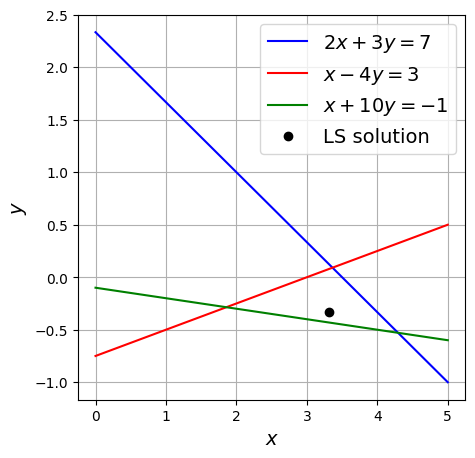

In [ ]:

A = np.array([[2, 3], [1, -4], [1, 10]])

# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ np.array([7,3,-1])

# solve the system
ls_sol = sl.solve(ATA, rhs)

# plot this solution to see where it lies

x = np.linspace(0,5,100)

y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)
y3 = -(1./10.)*x - (1./10.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')
ax1.plot(x,y3,'g', label='$x+10y=-1$')
ax1.plot(ls_sol[0], ls_sol[1], 'ko', label='LS solution')

ax1.legend(loc='best', fontsize=14)

Now, we can look at how our residual norm varies under perturbations that are mutliples of the null space vectors.

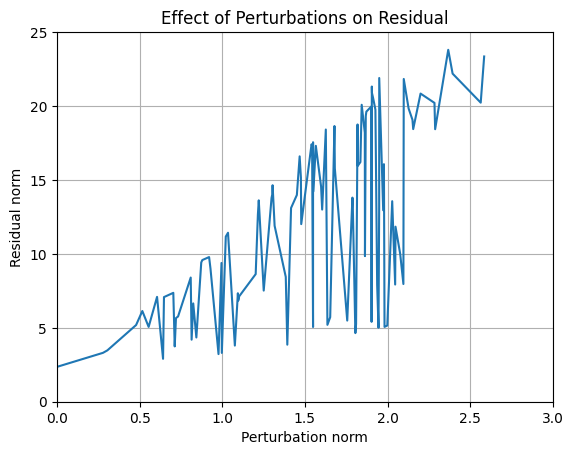

Our solution norm: 3.3361700833237897


In [ ]:
%matplotlib inline
pert = np.random.uniform(-2, 2, size=(100,2))
pert = np.vstack([pert, np.array([0, 0])]) # ensure [0, 0] is checked

b = np.array([7,3,-1])

# compute the 2 norm
residuals = np.array([sl.norm(A@(ls_sol + p) - b) for p in pert])

fig = plt.figure()
ax1 = fig.add_subplot(111)
pert = np.linalg.norm(pert, axis=1) # compute perturbation magnitude

# Sort perturbations and residuals by perturbation magnitude
sorted_indices = np.argsort(pert)  # Get sorting order
sorted_pert_magnitudes = pert[sorted_indices]  # Order perturbation magnitudes
sorted_residuals = residuals[sorted_indices]  # Order residuals accordingly

ax1.plot(sorted_pert_magnitudes, sorted_residuals)
ax1.set_xlabel("Perturbation norm")
ax1.set_ylabel("Residual norm")
ax1.set_title("Effect of Perturbations on Residual")
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 25)
ax1.grid(True)
plt.show()


Above confirms that our solution is infact the minimum solution because perturbing our vector by multiples of the null space basis vectors, while being valid solutions, increase the norm of the residual.


#### Under determined case

A is under determined or fat if $m < n$. Let's look at a specific case

$$\begin{pmatrix}2 & 3 \\ 4 & 6 \end{pmatrix} \begin{pmatrix}x \\ y \end{pmatrix}= \begin{pmatrix} 7 \\ 10\end{pmatrix}$$

Above, notice that the first and second equations have the same LHS. Then our problem asks that for the same $x$ and $y$ one equation satisfies two constraints. There is clearly no solution in this case.

Thus, we seek to find a solution which minimises the residual once again. In the case of an under determined problem, we use the *minimum norm* solution, which is found by solving

$$AA^T \mathbf{x} = A^T \mathbf{b},$$

assuming $(AA^T)^{-1}$ exists.

Let's implement this from an example problem already in RREF, the augmented form of the matrix with zero RHS being

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 4 & 0 & 0 \\
0 & 1 & -2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 
  \end{array}
\right)$$

The system of equations reads

$$x_1 +4x_3 = 0,$$
$$x_2-2x_3 = 0,$$
$$x_4 = 0.$$ 

If we set $x_3 = \alpha$ then we find that $x_1 = -4\alpha$ and $x_2 = 2\alpha$ and as such we can write that the solution for $\mathbf{x}$ in the null space is

$$\mathbf{x} = \alpha \begin{pmatrix}-4 \\ 2 \\ 1 \\ 0 \end{pmatrix},$$ 

or equivalently 

$$\mathbf{x} = span \begin{pmatrix}-4 \\ 2 \\ 1 \\ 0 \end{pmatrix}.$$

Any combination of scalar multiples are equally valid solutions to the homogeneous problem, but they will not neccesarily minimise our problem. Let's compute our minimum norm solution in code and use that to check how additions of the basis vectors influence the residual.

In [55]:
# Setting our system
A = np.array([[1, 0, 4, 0], [0, 1, -2, 0], [0, 0, 0, 1]])
b = np.array([1, -2, 3])

# Computing LHS and RHS
AAt = A@A.T
At = A.T 

# Now compute the min norm solution
x = At @ sl.inv(AAt) @ b

print(f'Min norm solution: {x}')
print(f'This is a solution: {np.allclose(b, A@x)}')

Min norm solution: [-0.52380952 -1.23809524  0.38095238  3.        ]
This is a solution: True


Text(0.5, 1.0, 'Trade-off Between Solution Norm and Residual Norm')

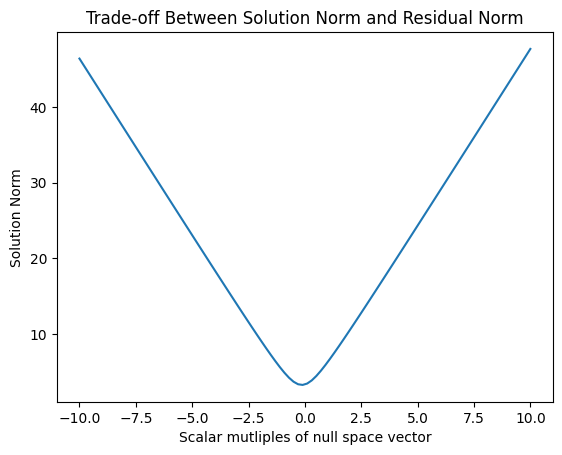

In [57]:
null = np.array([-4, 2, 1, 1])

multiples = np.linspace(-10, 10, 100)

# Compute null space multiple perturbations
sols = [x + mult*null for mult in multiples]
sol_norms = [sl.norm(s) for s in sols]

fig, ax = plt.subplots()
ax.plot(multiples, sol_norms)

# Labels and title
ax.set_xlabel("Scalar mutliples of null space vector")
ax.set_ylabel("Solution Norm")
ax.set_title("Trade-off Between Solution Norm and Residual Norm")

# Lecture 5: Under, Over, and Mixed Determined Problems.